In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



In [ ]:
SECTOR_ETFS = {
    'XLK': 'Technology',
    'XLY': 'Consumer Discretionary',
    'XLF': 'Financials',
    'XLV': 'Healthcare',
    'XLU': 'Utilities',
    'XLE': 'Energy',
    'XLRE': 'Real Estate',
}



In [ ]:
ECONOMIC_PHASES = {
    'Recovery': ['Technology', 'Consumer Discretionary'],
    'Expansion': ['Financials', 'Industrials'],  # Industrials not present, will adjust logic
    'Slowdown': ['Healthcare', 'Consumer Staples'],  # Consumer Staples not present, will adjust
    'Recession': ['Utilities', 'Consumer Staples'],
}



In [ ]:
SUBSTITUTES = {
    'Industrials': 'Financials',  # Use Financials as proxy for Expansion
    'Consumer Staples': 'Healthcare'  # Use Healthcare as proxy for Slowdown/Recession
}



In [ ]:
start_date = '2010-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')



In [ ]:
etf_data = yf.download(tickers, start=start_date, end=end_date)

<ipython-input-28-24efadade868>:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  etf_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  7 of 7 completed


In [ ]:
print(tickers)

['XLK', 'XLY', 'XLF', 'XLV', 'XLU', 'XLE', 'XLRE']


In [ ]:
print("\nColumns in the downloaded DataFrame:")
print(etf_data.columns)




Columns in the downloaded DataFrame:
MultiIndex([( 'Close',  'XLE'),
            ( 'Close',  'XLF'),
            ( 'Close',  'XLK'),
            ( 'Close', 'XLRE'),
            ( 'Close',  'XLU'),
            ( 'Close',  'XLV'),
            ( 'Close',  'XLY'),
            (  'High',  'XLE'),
            (  'High',  'XLF'),
            (  'High',  'XLK'),
            (  'High', 'XLRE'),
            (  'High',  'XLU'),
            (  'High',  'XLV'),
            (  'High',  'XLY'),
            (   'Low',  'XLE'),
            (   'Low',  'XLF'),
            (   'Low',  'XLK'),
            (   'Low', 'XLRE'),
            (   'Low',  'XLU'),
            (   'Low',  'XLV'),
            (   'Low',  'XLY'),
            (  'Open',  'XLE'),
            (  'Open',  'XLF'),
            (  'Open',  'XLK'),
            (  'Open', 'XLRE'),
            (  'Open',  'XLU'),
            (  'Open',  'XLV'),
            (  'Open',  'XLY'),
            ('Volume',  'XLE'),
            ('Volume',  'XLF'),
  

In [ ]:
if isinstance(etf_data.columns, pd.MultiIndex):
    if 'Close' in etf_data.columns.levels[0]:
        close_prices = etf_data['Close']
    else:
        print("\nError: 'Close' not found in MultiIndex columns.")
        print("Available first level columns:", etf_data.columns.levels[0])
        close_prices = None
elif 'Close' in etf_data.columns:
    close_prices = etf_data[['Close']]
else:
    print("\nError: 'Close' not found in columns.")
    print("Available columns:", etf_data.columns)
    close_prices = None

if close_prices is not None:
    print("\nFirst few rows of daily Close prices:")
    print(close_prices.head())
else:
    print("\nCould not extract 'Close' prices. Please check the output above for debugging.")




First few rows of daily Close prices:
Ticker            XLE       XLF        XLK  XLRE        XLU        XLV  \
Date                                                                     
2010-01-04  35.357693  9.049462  18.833551   NaN  18.151890  24.296610   
2010-01-05  35.646271  9.215787  18.809265   NaN  17.935793  24.058334   
2010-01-06  36.073135  9.234271  18.598839   NaN  18.040922  24.304300   
2010-01-07  36.019035  9.431402  18.525993   NaN  17.959156  24.388847   
2010-01-08  36.253498  9.375959  18.647396   NaN  17.941633  24.427286   

Ticker            XLY  
Date                   
2010-01-04  24.759157  
2010-01-05  24.849949  
2010-01-06  24.882956  
2010-01-07  25.089281  
2010-01-08  25.081034  


In [ ]:
monthly_close = close_prices.resample('M').last()

print("\nFirst few rows of monthly Close prices:")
print(monthly_close.head())




First few rows of monthly Close prices:
Ticker            XLE       XLF        XLK  XLRE        XLU        XLV  \
Date                                                                     
2010-01-31  32.766438  8.735288  16.963945   NaN  17.246626  24.042967   
2010-02-28  33.752434  9.043302  17.554770   NaN  17.018856  24.135202   
2010-03-31  34.703197  9.848057  18.755495   NaN  17.476755  24.778978   
2010-04-30  36.145138  9.977716  18.990952   NaN  17.936367  23.814964   
2010-05-31  32.006340  9.063916  17.570078   NaN  16.946447  22.264837   

Ticker            XLY  
Date                   
2010-01-31  23.859579  
2010-02-28  25.188322  
2010-03-31  27.154730  
2010-04-30  28.791964  
2010-05-31  26.766104  


In [ ]:
one_month_returns = monthly_close.pct_change(periods=1) * 100  # percent
three_month_returns = monthly_close.pct_change(periods=3) * 100  # percent



In [ ]:
latest_month = monthly_close.index[-1]

In [ ]:
latest_1m = one_month_returns.loc[latest_month]
latest_3m = three_month_returns.loc[latest_month]



In [ ]:
sector_perf = pd.DataFrame({
    '1M Return (%)': latest_1m,
    '3M Return (%)': latest_3m,
})
sector_perf.index.name = 'Sector'



In [ ]:
sector_perf_sorted = sector_perf.sort_values(by='3M Return (%)', ascending=False)

print("\nSector performance sorted by 3-month return (latest month):")
print(sector_perf_sorted)




Sector performance sorted by 3-month return (latest month):
        1M Return (%)  3M Return (%)
Sector                              
XLK          3.024926      24.457023
XLY          2.227026      12.867472
XLF          0.324617       8.121539
XLE          1.355974       7.651272
XLU          2.559388       6.884014
XLRE         1.014008       2.223927
XLV         -2.188588      -5.695613


In [ ]:
latest_1m = one_month_returns.loc[latest_month]
latest_3m = three_month_returns.loc[latest_month]

# Combine 1m and 3m returns into a DataFrame for easy viewing
sector_perf = pd.DataFrame({
    'Sector': [SECTOR_ETFS[ticker] for ticker in latest_1m.index],
    '1M Return (%)': latest_1m.values,
    '3M Return (%)': latest_3m.values,
})
sector_perf.set_index('Sector', inplace=True)

# Rank sectors by 3M Return (primary momentum metric)
sector_perf_sorted = sector_perf.sort_values(by='3M Return (%)', ascending=False)



In [ ]:
def infer_economic_phase(sector_ranking):
    """
    Infers the most likely economic phase by checking which phase's strong sectors
    are most represented in the top 3 performing sectors.
    """
    top_sectors = sector_ranking.index[:3].tolist()
    phase_scores = {}
    for phase, strong_sectors in ECONOMIC_PHASES.items():
        # Substitute for missing sectors
        strong_sectors = [
            SUBSTITUTES.get(sector, sector) if sector not in SECTOR_ETFS.values() else sector
            for sector in strong_sectors
        ]
        # Count how many of the top sectors match
        matches = len(set(top_sectors) & set(strong_sectors))
        phase_scores[phase] = matches

    # Pick the phase with most matches in top sectors
    likely_phase = max(phase_scores, key=phase_scores.get)
    return likely_phase, phase_scores



In [ ]:
likely_phase, phase_scores = infer_economic_phase(sector_perf_sorted)

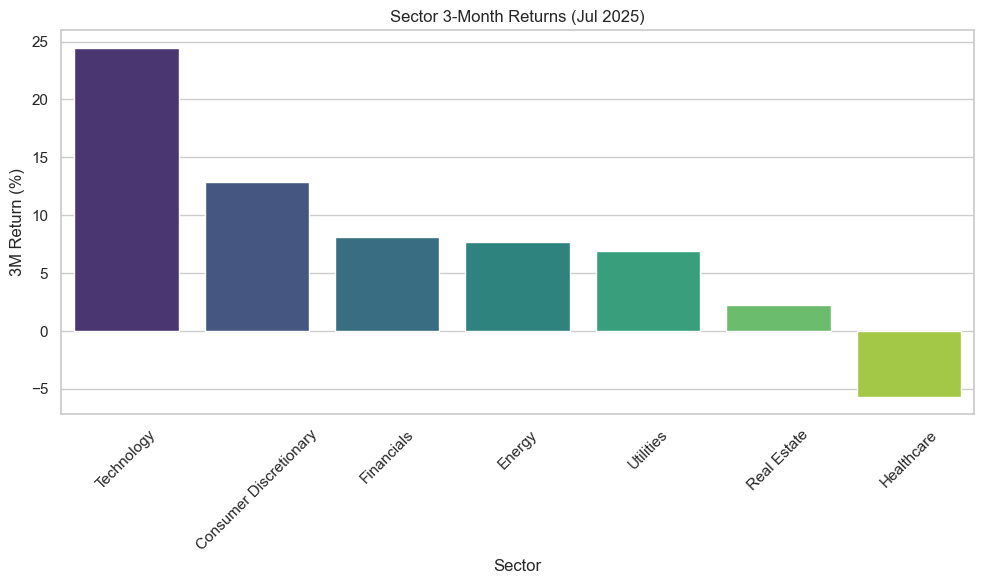

In [ ]:
sns.set(style="whitegrid")

# Bar chart of sector 3M returns for latest month
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sector_perf_sorted.index,
    y=sector_perf_sorted['3M Return (%)'],
    palette="viridis"
)
plt.title(f"Sector 3-Month Returns ({latest_month.strftime('%b %Y')})")
plt.ylabel("3M Return (%)")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



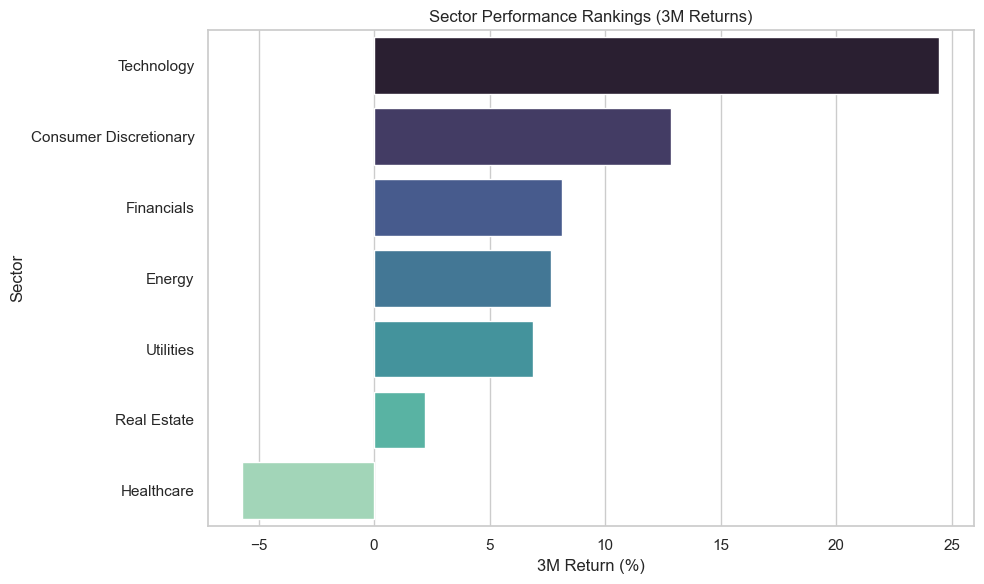

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sector_perf_sorted['3M Return (%)'],
    y=sector_perf_sorted.index,
    palette="mako"
)
plt.title("Sector Performance Rankings (3M Returns)")
plt.xlabel("3M Return (%)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()



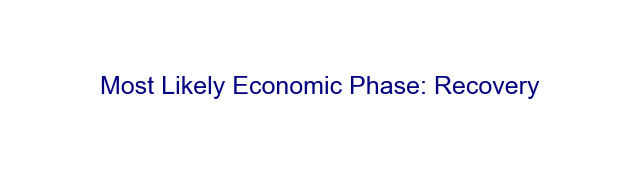

In [ ]:
plt.figure(figsize=(8, 2))
plt.axis('off')
plt.text(
    0.5, 0.5,
    f"Most Likely Economic Phase: {likely_phase}",
    fontsize=18,
    color="navy",
    ha='center', va='center'
)
plt.show()



In [ ]:
top_3_sectors = sector_perf_sorted.index[:3].tolist()

In [ ]:
phase_explanations = {
    'Recovery': "Markets are bouncing back. Technology and consumer-focused sectors tend to lead, reflecting renewed optimism.",
    'Expansion': "The economy is growing steadily. Financials (and typically Industrials) perform well as growth broadens.",
    'Slowdown': "Growth is cooling off. Healthcare and defensive sectors gain strength as investors seek stability.",
    'Recession': "Economic activity is contracting. Utilities and defensive sectors outperform as investors prioritize safety."
}

print("\n" + "="*60)
print("Sector Rotation Model Summary")
print("="*60)
print(f"Top 3 Sectors (recent performance): {', '.join(top_3_sectors)}")
print(f"Most Likely Economic Phase: {likely_phase}")
print(f"\nWhat this means: {phase_explanations.get(likely_phase, 'No explanation available.')}")
print("="*60)




Sector Rotation Model Summary
Top 3 Sectors (recent performance): Technology, Consumer Discretionary, Financials
Most Likely Economic Phase: Recovery

What this means: Markets are bouncing back. Technology and consumer-focused sectors tend to lead, reflecting renewed optimism.
